# Laboratorio 1 

Integrantes del analisis:

- Manuel Archila 161250

- Diego Franco 20240

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
from factor_analyzer import FactorAnalyzer
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


# Varibles
- Age: Edad de la paciente
- Number.of.sexual.partners: Cantidad de parejas sexuales que ha tenido la paciente desde que inició su vida sexual
- First.sexual.intercourse: Edad a la que tuvo el primer encuentro sexual.
- Num.of.pregnancies: Cantidad de embarazos
- Smokes: Si fuma o no
- Smokes.years: Años que lleva fumando
- Smokes.packs.per.year: Cajetillas de cigarrillos por año que fuma la paciente
- Hormonal.Contraceptives: Si usa anticonceptivos hormonales o no
- Hormonal.Contraceptives.years: Años que lleva usando anticonceptivos hormonales
- IUD: Si tiene colocado algún dispositivo intrauterino (DIU)
- IUD.years: Años que lleva usando un DIU
- STDs: Si ha tiene enfermedades de transmisión sexual (ETS)
- STDs.number: Cuantas ETS ha tenido
- STDs.condylomatosis: si ha tenido condilomatosis
- STDs.cervical.condylomatosis: si ha tenido condilomatosis cervical
- STDs.vaginal.condylomatosis: Si ha tenido condilomatosis vaginal
- STDs.vulvo.perineal.condylomatosis: Si ha tenido condilomatosis vulvo perineal
- STDs.syphilis: Si ha tenido Sífilis
- STDs.pelvic.inflammatory.disease: Si ha tenido inflamaciones pélvicas
- STDs.genital.herpes: si ha tenido herpes genital
- STDs.molluscum.contagiosum: Si ha tenido molusco contagioso
- STDs.AIDS: Si tiene SIDA
- STDs.HIV: Si tiene VIH
- STDs.Hepatitis.B: si ha tenido o tiene hepatitis B
- STDs.HPV: Si ha tenido o tiene Virus del Papiloma Humano (VPH)
- STDs.Number.of.diagnosis: Cantidad de diagnósticos de ETS
- STDs.Time.since.first.diagnosis: Tiempo desde el primer diagnóstico
- STDs.Time.since.last.diagnosis: Tiempo desde el último diagnóstico
- Dx.Cancer: Si tiene diagnóstico de cáncer o no
- Dx.CIN: Si tiene diagnóstico de NIC (Neoplasia Intraepitelial Cervical)
- Dx.HPV: Si tiene diagnóstico de Virus del Papiloma Humano
- Dx: Si tiene diagnóstico
- Hinselmann: Si hicieron Colposcopía
- Schiller: Si hicieron la prueba de Schiller
- Citology: Si hicieron citología o no.
- Biopsy: Si hicieron Biopsia o no

# Descripcion y tipo de las varibales

- Age: Cuantitativa continua (edad en años).
- Number.of.sexual.partners: Cuantitativa discreta (cantidad de parejas sexuales).
- First.sexual.intercourse: Cuantitativa discreta (edad al primer encuentro sexual).
- Num.of.pregnancies: Cuantitativa discreta (cantidad de embarazos).
- Smokes: Cualitativa o categórica nominal (sí o no, si fuma o no).
- Smokes.years: Cuantitativa continua (años que lleva fumando).
- Smokes.packs.per.year: Cuantitativa discreta (cantidad de cajetillas de cigarrillos por año).
- Hormonal.Contraceptives: Cualitativa o categórica nominal (sí o no, si usa anticonceptivos hormonales o no).
- Hormonal.Contraceptives.years: Cuantitativa continua (años que lleva usando anticonceptivos hormonales).
- IUD: Cualitativa o categórica nominal (sí o no, si tiene un DIU colocado).
- IUD.years: Cuantitativa continua (años que lleva usando un DIU).
- STDs: Cualitativa o categórica nominal (sí o no, si tiene enfermedades de transmisión sexual).
- STDs.number: Cuantitativa discreta (cantidad de ETS que ha tenido).
- STDs.condylomatosis: Cualitativa o categórica nominal (sí o no, si ha tenido condilomatosis).
- STDs.cervical.condylomatosis: Cualitativa o categórica nominal (sí o no, si ha tenido condilomatosis cervical).
- STDs.vaginal.condylomatosis: Cualitativa o categórica nominal (sí o no, si ha tenido condilomatosis vaginal).
- STDs.vulvo.perineal.condylomatosis: Cualitativa o categórica nominal (sí o no, si ha tenido condilomatosis vulvo perineal).
- STDs.syphilis: Cualitativa o categórica nominal (sí o no, si ha tenido sífilis).
- STDs.pelvic.inflammatory.disease: Cualitativa o categórica nominal (sí o no, si ha tenido inflamaciones pélvicas).
- STDs.genital.herpes: Cualitativa o categórica nominal (sí o no, si ha tenido herpes genital).
- STDs.molluscum.contagiosum: Cualitativa o categórica nominal (sí o no, si ha tenido molusco contagioso).
- STDs.AIDS: Cualitativa o categórica nominal (sí o no, si tiene SIDA).
- STDs.HIV: Cualitativa o categórica nominal (sí o no, si tiene VIH).
- STDs.Hepatitis.B: Cualitativa o categórica nominal (sí o no, si ha tenido o tiene hepatitis B).
- STDs.HPV: Cualitativa o categórica nominal (sí o no, si ha tenido o tiene Virus del Papiloma Humano).
- STDs.Number.of.diagnosis: Cuantitativa discreta (cantidad de diagnósticos de ETS).
- STDs.Time.since.first.diagnosis: Cuantitativa continua (tiempo desde el primer diagnóstico de ETS).
- STDs.Time.since.last.diagnosis: Cuantitativa continua (tiempo desde el último diagnóstico de ETS).
- Dx.Cancer: Cualitativa o categórica nominal (sí o no, si tiene diagnóstico de cáncer).
- Dx.CIN: Cualitativa o categórica nominal (sí o no, si tiene diagnóstico de NIC - Neoplasia Intraepitelial Cervical).
- Dx.HPV: Cualitativa o categórica nominal (sí o no, si tiene diagnóstico de Virus del Papiloma Humano).
- Dx: Cualitativa o categórica nominal (sí o no, si tiene algún diagnóstico en general).
- Hinselmann: Cualitativa o categórica nominal (sí o no, si se realizó Colposcopía).
- Schiller: Cualitativa o categórica nominal (sí o no, si se realizó la prueba de Schiller).
- Citology: Cualitativa o categórica nominal (sí o no, si se realizó citología).
- Biopsy: Cualitativa o categórica nominal (sí o no, si se realizó biopsia).

In [64]:
df = pd.read_csv("./risk_factors_cervical_cancer.csv")

print("Número de filas y columnas:", df.shape)

print("Primeras filas del conjunto de datos:")
print(df.describe())


Número de filas y columnas: (858, 36)
Primeras filas del conjunto de datos:
              Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513                   0.087413    0.020979    0.010490   
std      8.497948                   0.302545    0.143398    0.101939   
min     13.000000                   0.000000    0.000000    0.000000   
25%     20.000000                   0.000000    0.000000    0.000000   
50%     25.000000                   0.000000    0.000000    0.000000   
75%     32.000000                   0.000000    0.000000    0.000000   
max     84.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.

In [65]:
print('\n Información del data set')
print(df.info())



 Información del data set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                           

In [66]:

print("\n Tipos de datos en cada columna:")
print(df.dtypes)



 Tipos de datos en cada columna:
Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:    ondylomatosis                object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS            

In [67]:
df.replace('?', np.NAN, inplace=True)

print("Cantidad de valores faltantes por columna:")
print(df.isnull().sum())

Cantidad de valores faltantes por columna:
Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:    ondylomatosis                105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                         

In [68]:
cuantitativas_col = [
    'Age',
    'Number of sexual partners', 
    'First sexual intercourse', 
    'Num of pregnancies',
    'Smokes (years)',
    'Smokes (packs/year)',
    'Hormonal Contraceptives (years)',
    'IUD (years)',
    'STDs (number)',
    'STDs: Number of diagnosis',
    'STDs: Time since first diagnosis',
    'STDs: Time since last diagnosis'
]

cuantitativas = df[cuantitativas_col]

DFcopy = df.copy()

cualitativas = df.drop(cuantitativas_col, axis=1)

print(cualitativas.columns)

Index(['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
       'STDs:condylomatosis', 'STDs:    ondylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN',
       'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')


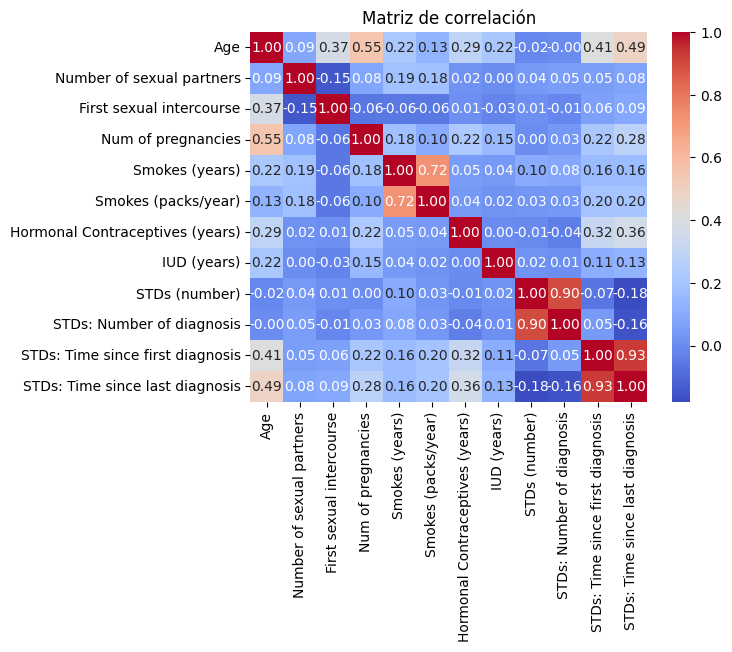

In [69]:
cuantitativas = cuantitativas.astype(float)
corr_matrix = cuantitativas.corr()   

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


Al analizar el diagrama de correlación, podemos identificar patrones y tendencias en la asociación entre las variables, lo que nos proporciona información valiosa para entender cómo interactúan las diferentes características del conjunto de datos. Entre las relaciones más destacadas, se encuentran las siguientes:

- Smoke year y Smokes packs / years: Estas dos variables están altamente correlacionadas, lo que indica que las personas que fuman más cigarrillos por año, también consumen mas cajetillas al  años.

- Por otro lado tenemos las varibales  STDs.Time.since.first.diagnosis: Cuantitativa continua (tiempo desde el primer diagnóstico de ETS), STDs.Time.since.last.diagnosis: Cuantitativa continua (tiempo desde el último diagnóstico de ETS). Las cuales poseen una correlacion de 0.93 entre si. Esta alta correlación sugiere que existe una relación lineal casi perfecta entre ambas variables. Cuando el tiempo desde el primer diagnóstico de ETS aumenta, el tiempo desde el último diagnóstico de ETS también tiende a aumentar en la misma proporción. 
Pero tambien puede significar que  ambas variables están midiendo prácticamente la misma información.

<Figure size 1000x600 with 0 Axes>

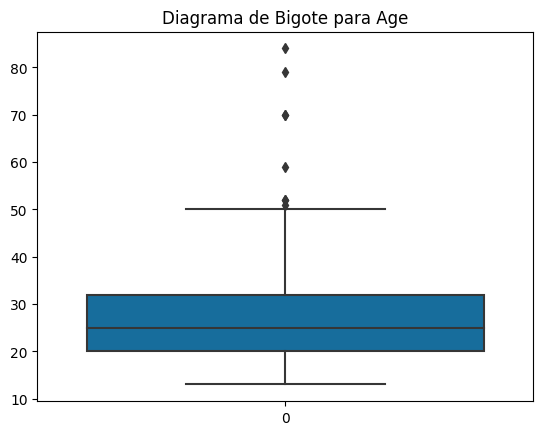

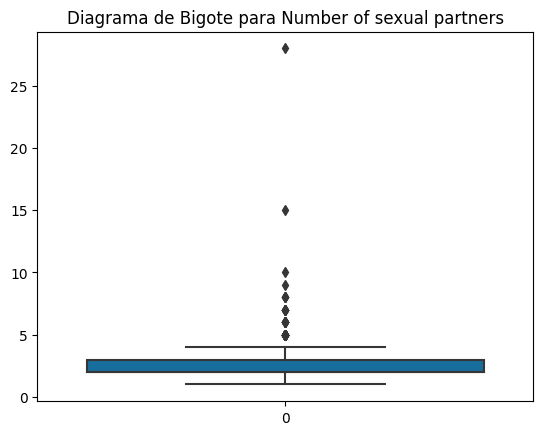

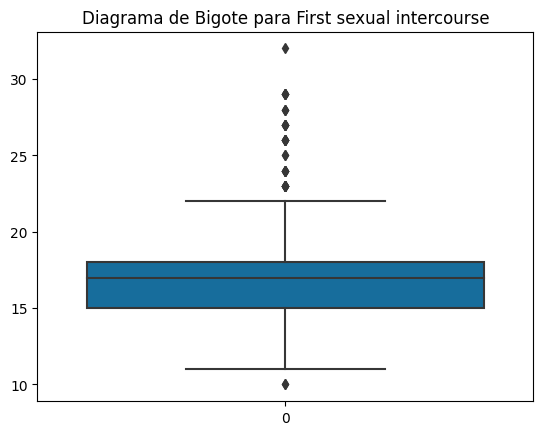

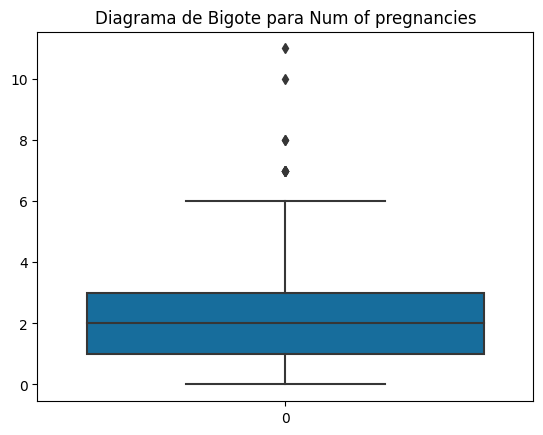

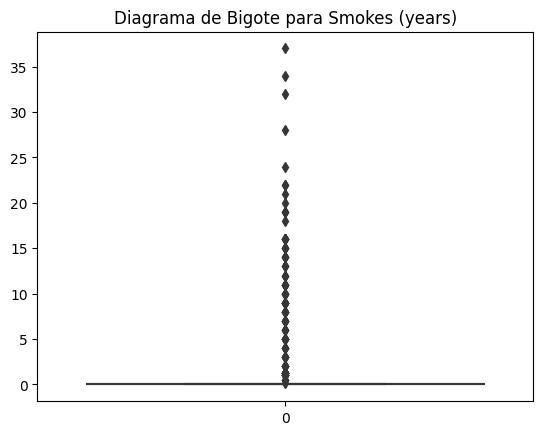

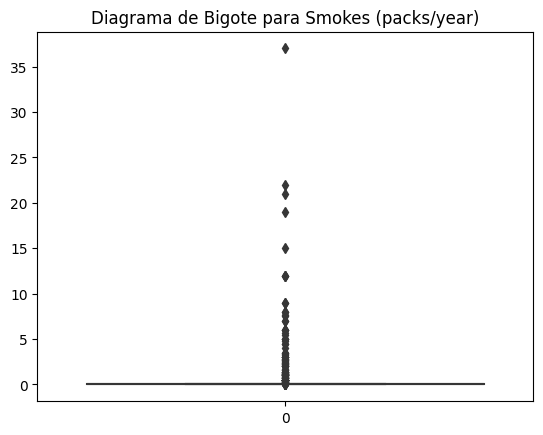

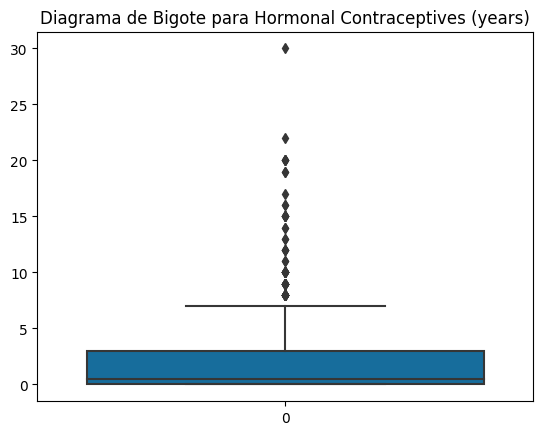

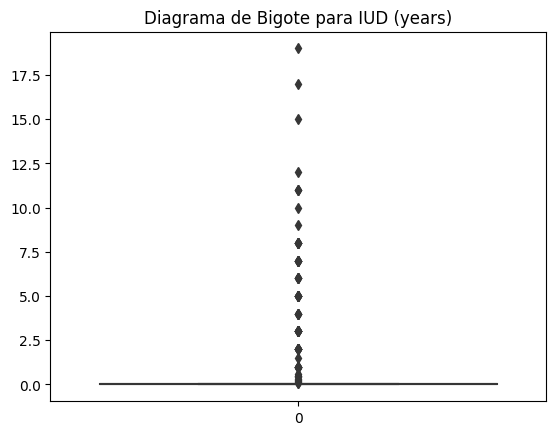

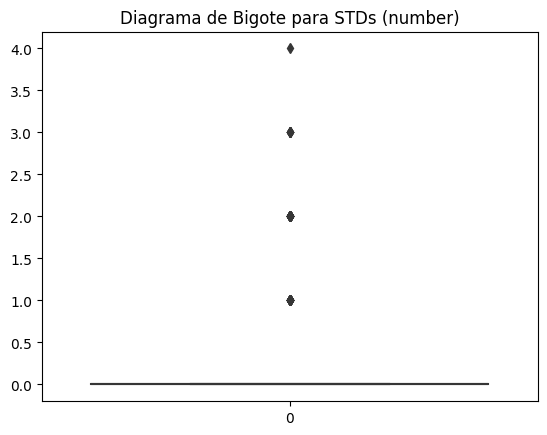

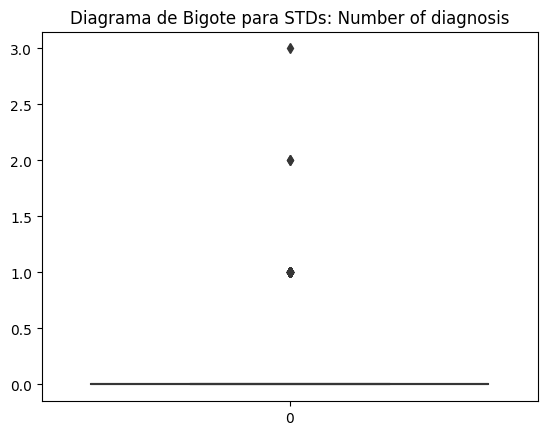

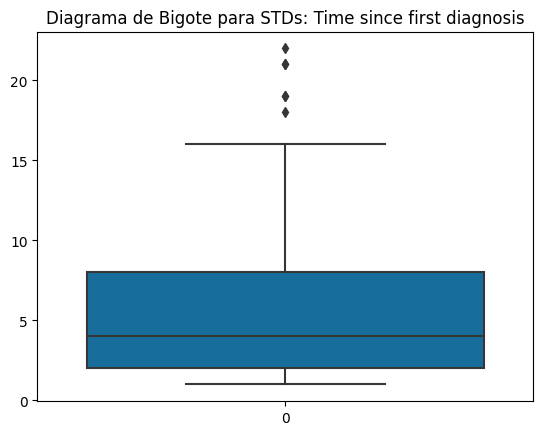

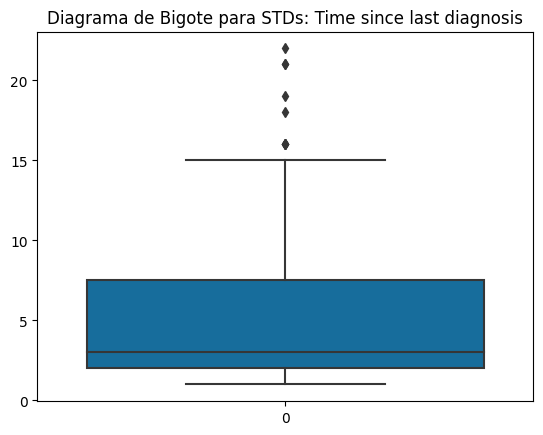

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'cuantitativas' es el DataFrame que contiene las variables cuantitativas

# Obtener una lista con los nombres de las columnas cuantitativas
columnas_cuantitativas = cuantitativas.columns

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Iterar sobre cada columna cuantitativa y crear un diagrama de bigote individual
for columna in columnas_cuantitativas:
    plt.figure()  # Crea una nueva figura para cada diagrama
    sns.boxplot(data=cuantitativas[columna], palette='colorblind')
    plt.title(f"Diagrama de Bigote para {columna}")
    plt.show()


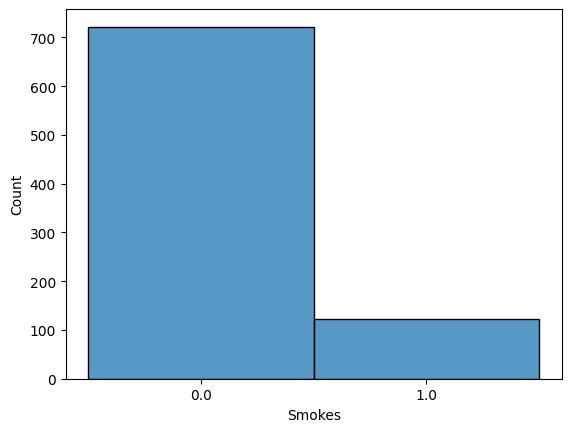

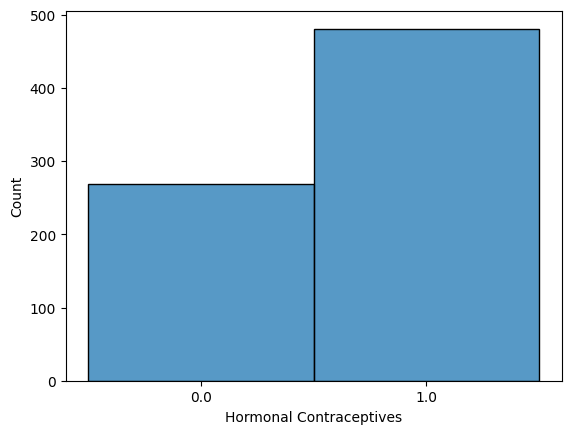

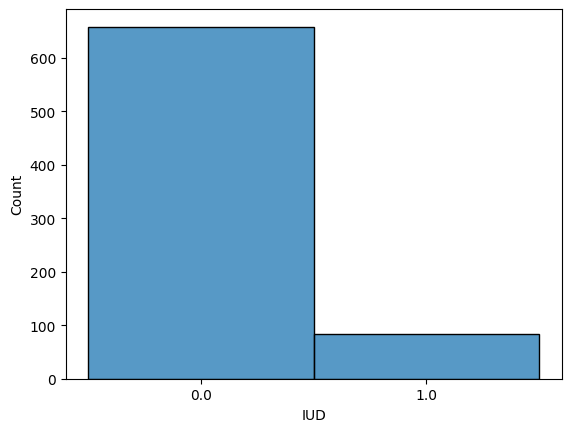

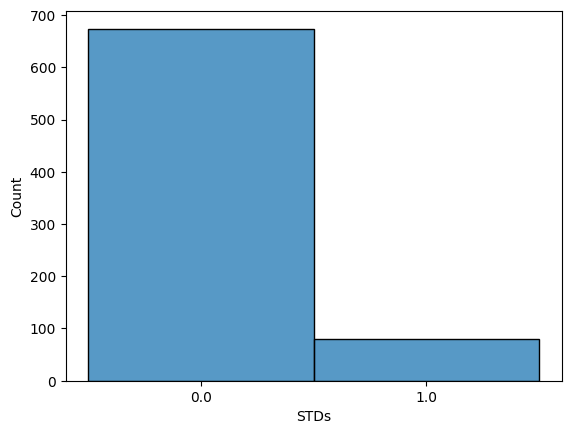

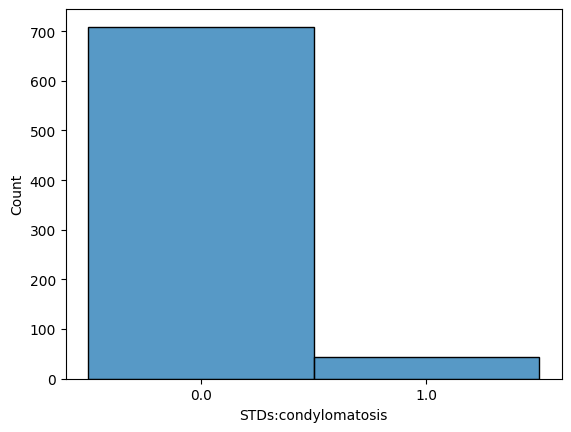

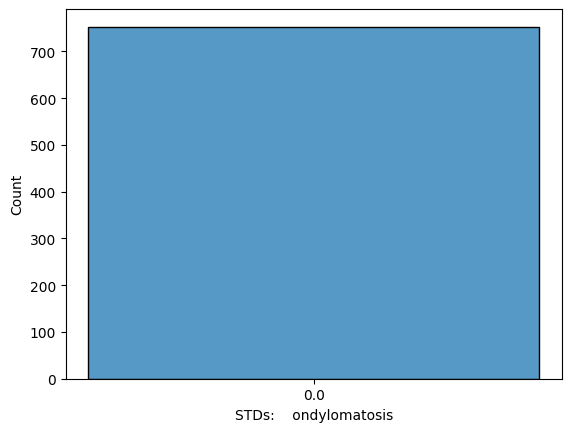

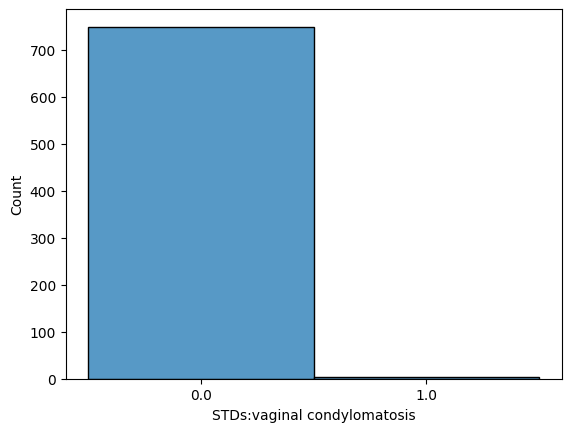

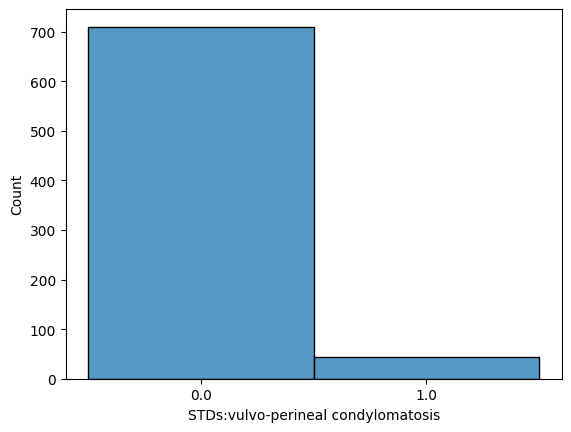

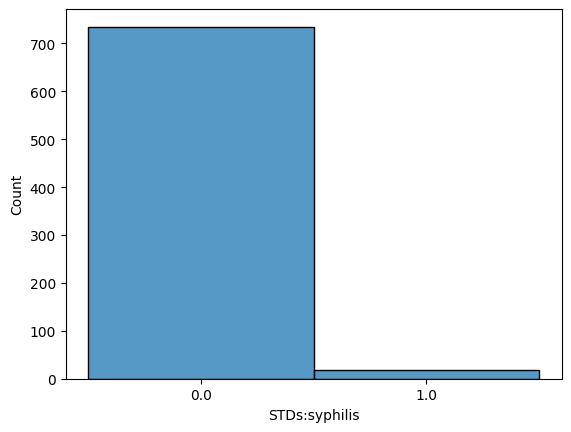

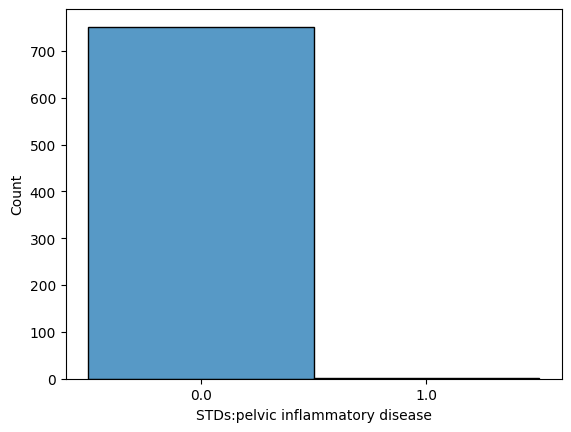

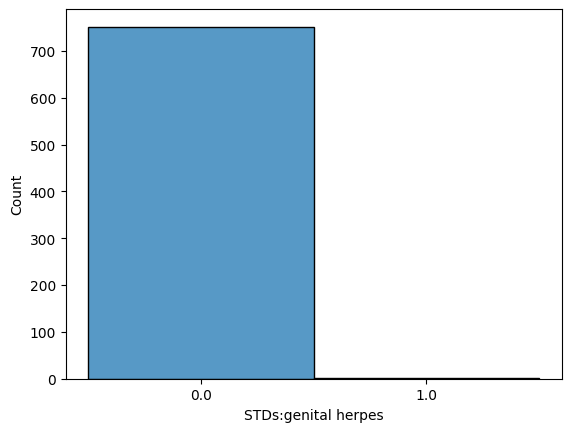

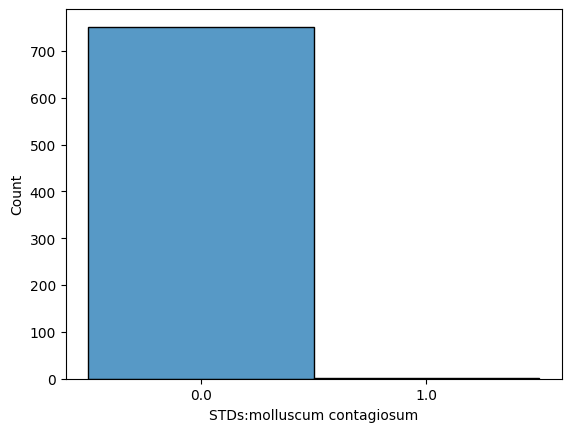

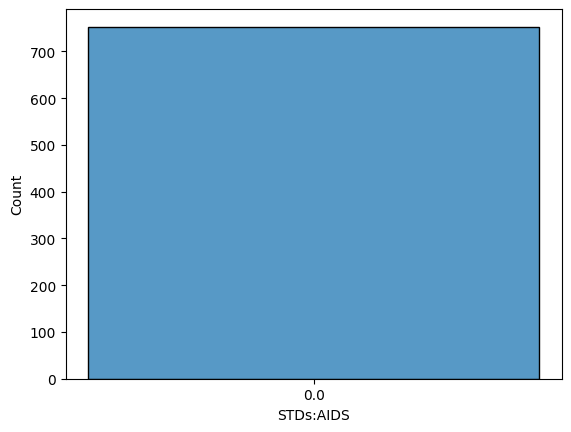

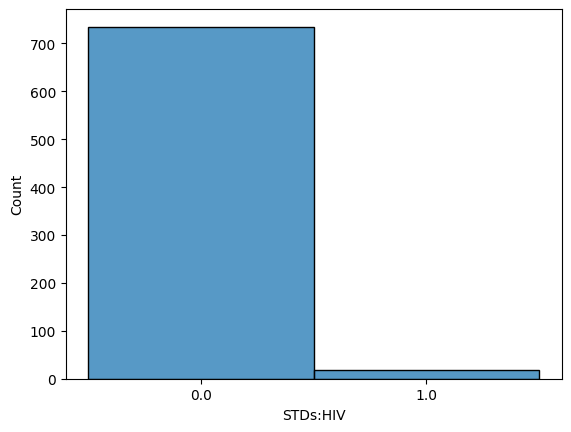

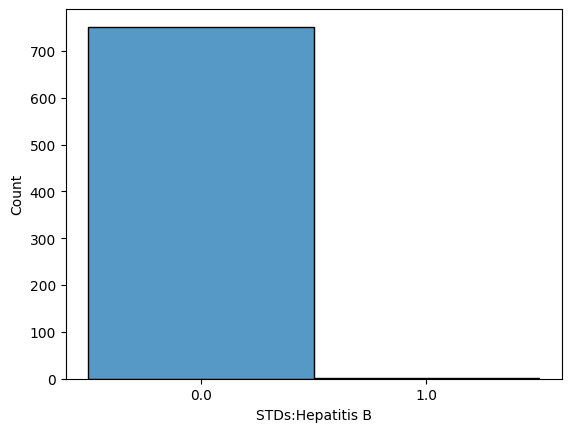

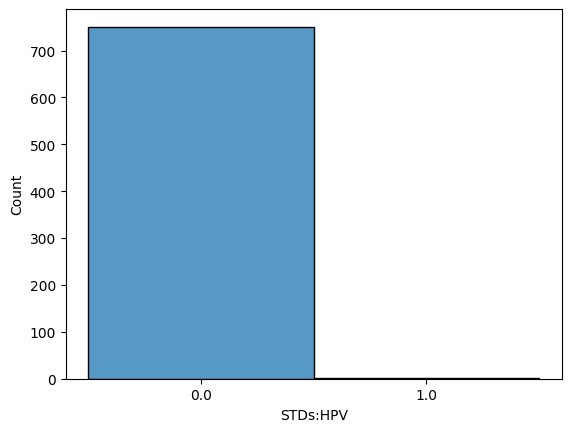

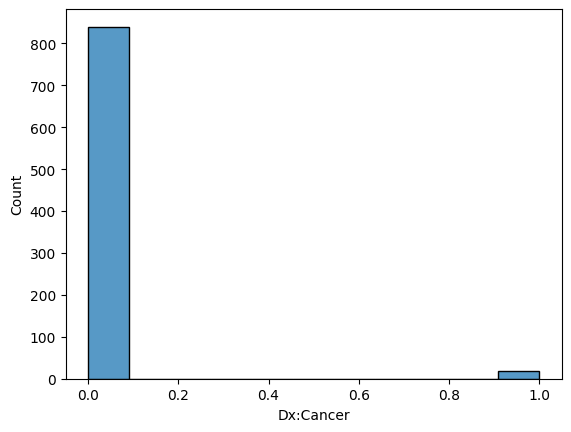

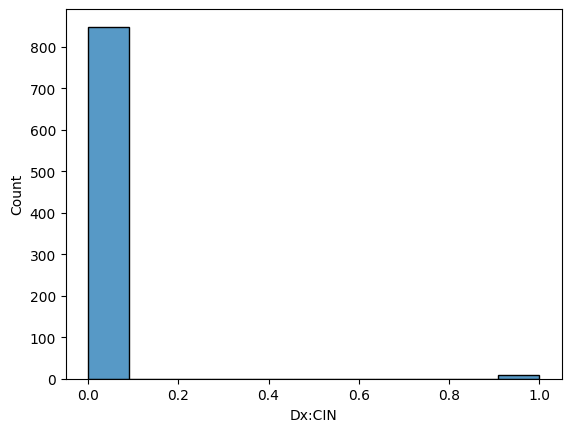

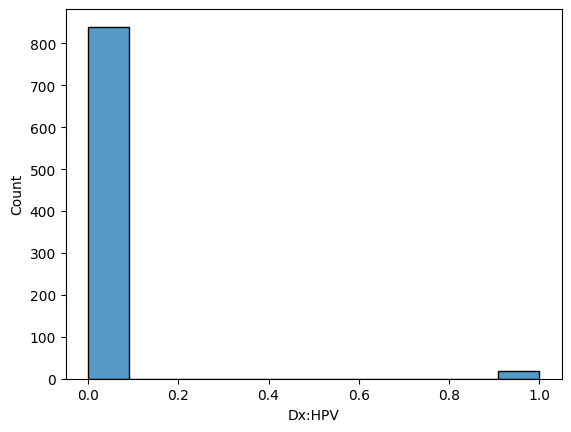

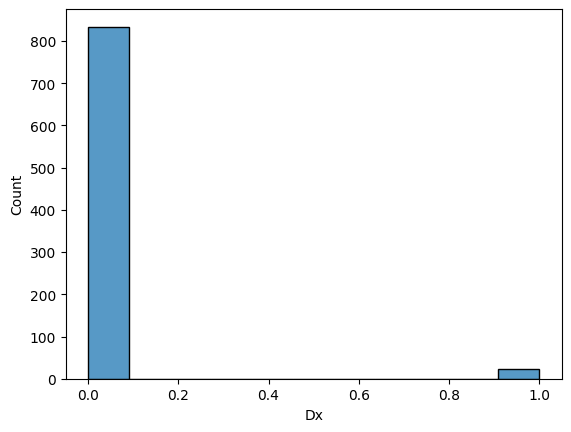

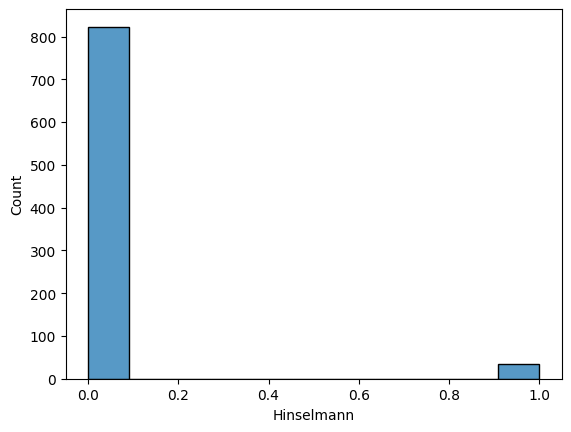

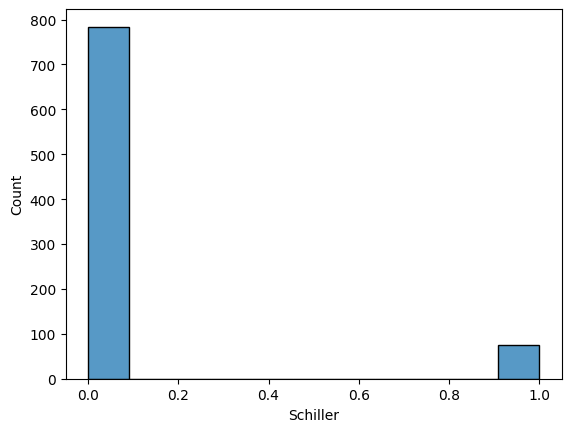

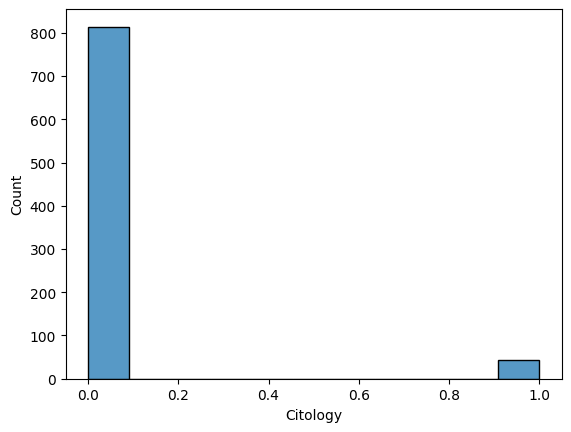

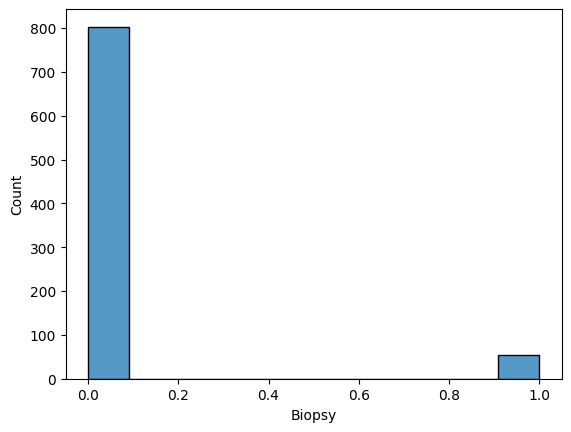

In [71]:
for column in cualitativas.columns:
    sns.histplot(cualitativas[column])
    plt.show()

En cuanto a los diagramas de caja y bigote es posible observar que todas las gráficos presentan puntos atípicos. Algunos de los diagramas más afectados por puntos atípicos son IUD(years), STDs(numbers) y STDs(number of diagnosis), ya la mayoría de sus valores estan en 0. 

Debido a que la cantidad de los datos faltantes no es muy grande podemos aplicar una tecnica de oversampling para rellenar los datos faltantes. La tecnica utilizada insertar valores de una distribución aleatoria generada.

In [72]:
# Define a function to replace NaN with random values based on column statistics
def replace_nan_with_random(column):
    if pd.api.types.is_numeric_dtype(column):
        mean = column.mean()
        std = column.std()
        num_nan = column.isnull().sum()
        random_values = np.random.normal(mean, std, num_nan)
        return random_values
    else:
        non_nan_values = column.dropna()
        num_nan = column.isnull().sum()
        random_values = np.random.choice(non_nan_values, num_nan, replace=True)
        return random_values

# Iterate over each column with NaN values and replace them with random numbers
for columna in df.columns[df.isnull().any()]:
    random_values = replace_nan_with_random(df[columna])
    df.loc[df[columna].isnull(), columna] = random_values

# print(df.isnull().sum())

# print(df.head(20))


In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Estandarizar los datos numéricos
scaler = StandardScaler()

cualitativas = df.drop(cuantitativas_col, axis=1)

variables_numericas_estandarizadas = scaler.fit_transform(cualitativas)

# Aplicar PCA solo en las variables numéricas
pca = PCA(n_components=2)  # Puedes ajustar el número de componentes principales que deseas obtener
componentes_principales = pca.fit_transform(variables_numericas_estandarizadas)

# Crear un nuevo DataFrame con los componentes principales y las columnas de interés (opcional)
df_componentes_principales = pd.DataFrame(data=componentes_principales)



print(df_componentes_principales)

            0         1
0   -0.748843 -0.340437
1   -0.748843 -0.340437
2   -0.748843 -0.340437
3    4.663449 -3.984862
4   -0.730171 -0.422572
..        ...       ...
853 -0.748843 -0.340437
854 -0.730171 -0.422572
855  0.312441 -0.293169
856 -0.730171 -0.422572
857 -0.730171 -0.422572

[858 rows x 2 columns]


Tras hacer el analisis de PCA:

- Las variables con mayores cargas positivas en este componente pueden estar relacionadas con comportamientos o características relacionadas con la actividad sexual (por ejemplo, 'Number.of.sexual.partners', 'First.sexual.intercourse', 'Num.of.pregnancies').
Las variables con mayores cargas negativas pueden estar relacionadas con el uso o exposición a ciertas enfermedades de transmisión sexual (por ejemplo, 'STDs.number', 'STDs.condylomatosis', 'STDs.cervical.condylomatosis', 'STDs.vaginal.condylomatosis', 'STDs.vulvo.perineal.condylomatosis', 'STDs.syphilis', 'STDs.pelvic.inflammatory.disease', 'STDs.genital.herpes', 'STDs.molluscum.contagiosum', 'STDs.AIDS', 'STDs.HIV', 'STDs.Hepatitis.B', 'STDs.HPV').

- Las variables con mayores cargas positivas en este componente pueden estar relacionadas con el uso de anticonceptivos hormonales (por ejemplo, 'Hormonal.Contraceptives', 'Hormonal.Contraceptives.years').
Las variables con mayores cargas negativas pueden estar relacionadas con el consumo de tabaco (por ejemplo, 'Smokes', 'Smokes.years', 'Smokes.packs.per.year').

In [74]:

numerical_cols = [
    'Age', 'Number of sexual partners', 'First sexual intercourse',
    'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
    'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
    'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
    'STDs: Time since last diagnosis'
]
df_numeric = df[numerical_cols]

df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df_numeric)
kmo_all, kmo_model = calculate_kmo(data_standardized)
print("Índice KMO:", kmo_model)
chi_square_value, p_value = calculate_bartlett_sphericity(data_standardized)
print("Chi-Square:", chi_square_value)
print("P-value:", p_value)
num_components = 2

pca = PCA(n_components=num_components)
components = pca.fit_transform(data_standardized)

pca_df = pd.DataFrame(data=components, columns=[f"Componente_{i}" for i in range(1, num_components+1)])
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance_ratio)


Índice KMO: 0.4998794826482113
Chi-Square: 2308.0211748966326
P-value: 0.0
Varianza explicada por cada componente: [0.17780661 0.15106042]


Al ver el indice del KMO se puede ver la correlación de las variables es moderada debido al valor de 0.4971. De igual manera al observar el los resultado del test de Bartlett es posible observar como los datos si son aplicables para hacer un PCA. Finalmente el valor de la varianza confirma que se puede realizar el PCA. Despues de reducir la dimensinalidad de las variables se logra retener 33.43% de la información original, como se puede ver en los valores obtenidos en el bloque anterior. 

In [75]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import KBinsDiscretizer
df_discretized = df.copy()

numerical_cols  = [
    'Age',
    'Number of sexual partners', 
    'First sexual intercourse', 
    'Num of pregnancies',
    'Smokes (years)',
    'Smokes (packs/year)',
    'Hormonal Contraceptives (years)',
    'IUD (years)',
    'STDs (number)',
    'STDs: Number of diagnosis',
    'STDs: Time since first diagnosis',
    'STDs: Time since last diagnosis'
]

n_bins = 5

for col in numerical_cols:
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    df_discretized[col] = discretizer.fit_transform(df_discretized[[col]])

transactions = df_discretized.applymap(str).values.tolist()

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_array, columns=te.columns_)

confidence_levels = [0.5, 0.6, 0.7] 
support_levels = [0.1, 0.2, 0.3] 

for confidence in confidence_levels:
    for support in support_levels:
        frequent_itemsets = apriori(df_encoded, min_support=support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        print(f"Reglas con confianza >= {confidence:.2f} y soporte >= {support:.2f}:")
        print(rules)
        print()


Reglas con confianza >= 0.50 y soporte >= 0.10:
      antecedents    consequents  antecedent support  consequent support  \
0           (0.0)            (0)            1.000000            1.000000   
1             (0)          (0.0)            1.000000            1.000000   
2             (1)            (0)            0.138695            1.000000   
3           (1.0)            (0)            0.968531            1.000000   
4             (0)          (1.0)            1.000000            0.968531   
..            ...            ...                 ...                 ...   
83  (1.0, 4.0, 0)          (0.0)            0.166667            1.000000   
84     (0.0, 4.0)       (1.0, 0)            0.173660            0.968531   
85     (1.0, 4.0)       (0.0, 0)            0.166667            1.000000   
86       (4.0, 0)     (0.0, 1.0)            0.173660            0.968531   
87          (4.0)  (0.0, 1.0, 0)            0.173660            0.968531   

     support  confidence      lift  lev

Al hacer el analisis de las reglas de asociación obtenidas, se pueden inferir algunas cosas.

- En las reglas mostradas anteriormente, podemos ver que hay reglas que tienen un soporte y confianza del 100% y se generan a partir de antecedentes o consecuentes con un solo valor, por lo tanto estas reglas pueden ser descartadas ya que no aportan información relevante, sino que solo generan más ruido al analisis.

- Existen reglas que tienen un alto nivel de confianza y un soporte mayor al 0.10. Estas reglas pueden proporcionar información relevante sobre las relaciones entre variables, por lo tanto estas son a la cuales hay que darle mayor enfasis a la hora de hacer un analisis.

- Otras reglas tienen una confianza moderada pero un soporte significativo. Estas reglas también pueden ser interesantes, ya que indican relaciones menos frecuentes pero con mayor confianza.

# Hallazgos y conclusiones

Durante el análisis exploratorio de los datos, se examinaron diversas variables relacionadas con la salud sexual de las pacientes. Se identificaron características cuantitativas y categóricas en el dataset. Entre las variables cuantitativas continuas, se encontraron "Age" (edad en años), "STDs.Time.since.first.diagnosis" (tiempo desde el primer diagnóstico de ETS), y "STDs.Time.since.last.diagnosis" (tiempo desde el último diagnóstico de ETS). Por otro lado, entre las variables cuantitativas discretas, se hallaron "Number.of.sexual.partners" (cantidad de parejas sexuales), "First.sexual.intercourse" (edad al primer encuentro sexual), "Num.of.pregnancies" (cantidad de embarazos), "Smokes.years" (años que lleva fumando), "Smokes.packs.per.year" (cantidad de cajetillas de cigarrillos por año que fuma la paciente), entre otras.

En cuanto al análisis de correlación, se encontraron relaciones de interés entre algunas variables. Por ejemplo, se observó una correlación moderadamente fuerte de 0.72 entre "Smokes.years" y "Smokes.packs.per.year", lo que indica que las personas que han fumado durante más años tienden a consumir más cajetillas de cigarrillos por año en promedio.

El análisis también reveló una correlación muy alta de 0.9 entre "STDs.Time.since.first.diagnosis" y "STDs.Time.since.last.diagnosis", lo que sugiere una relación lineal casi perfecta entre el tiempo transcurrido desde el primer y último diagnóstico de ETS.

Al realizar el análisis de componentes principales (PCA) en las variables numéricas, se encontró que algunas de ellas mostraban una alta correlación entre sí. Esto puede indicar que dichas variables están midiendo información similar y podrían redundar en el análisis. 

- Las variables como STDs: cervical condylomatosis y STDs:AIDS son variables que podrían ser removidas del estudio ya que no aportan nueva información. Esto se debe a que los valores de estas variables son negativos en cuanto a si presenta la enfermedad o no.


Durante el análisis de reglas de asociación, se encontraron varias relaciones interesantes entre las variables. Por ejemplo, se identificaron reglas con altos niveles de confianza y soporte que muestran patrones de comportamiento entre diferentes variables categóricas. Estas reglas pueden proporcionar información valiosa sobre las tendencias y relaciones ocultas en los datos.